# Complete Pipeline for ATE + ABSA

get functions form ate_absa_pipeline.py

In [1]:
# need the sys package to load modules from another directory:
import sys
sys.path.append('../')
from functions.ate_absa_pipeline import *

/home/sc.uni-leipzig.de/ch31qoni/venv/absa/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print("Is CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

Is CUDA available: True
CUDA version: 12.6
GPU device name: NVIDIA A30


## 1. Load best models

In [4]:
# Load Pretrained ATE CAT Model
ate_cat_model_path = "./saved_models/best/ate_cat_deepset_gbert-base_42_42_6"  # Precision: 0.8557, Recall: 0.7905, F1-Score: 0.8218
ate_cat_tokenizer_path = "./saved_tokenizers/best/ate_cat_deepset_gbert-base_42_42_6"
ate_cat_tokenizer = AutoTokenizer.from_pretrained(ate_cat_tokenizer_path)
ate_cat_model = AutoModelForTokenClassification.from_pretrained(ate_cat_model_path)

# Load Pretrained ABSA Model
absa_model_path = "./saved_models/best/absa_aari1995_German_Sentiment_42_42_10"  # Macro Average: Precision: 0.8466, Recall: 0.8241, F1-Score: 0.8335
                                                                                 # Weighted Average: Precision: 0.8519, Recall: 0.8562, F1-Score: 0.8529
absa_tokenizer_path = "./saved_tokenizers/best/absa_aari1995_German_Sentiment_42_42_10"
absa_tokenizer = AutoTokenizer.from_pretrained(absa_tokenizer_path)
absa_model = AutoModelForSequenceClassification.from_pretrained(absa_model_path, num_labels=3)  # Ensure num_labels matches training

# Load Pretrained ABSA Model
absa_model_path2 = "./saved_models/best/absa_aari1995_German_Sentiment_42_42_7"  # Macro Average: Precision: 0.8514, Recall: 0.8597, F1-Score: 0.8550
                                                                                 # Weighted Average: Precision: 0.8764, Recall: 0.8758, F1-Score: 0.8759
absa_tokenizer_path2 = "./saved_tokenizers/best/absa_aari1995_German_Sentiment_42_42_7"
absa_tokenizer2 = AutoTokenizer.from_pretrained(absa_tokenizer_path2)
absa_model2 = AutoModelForSequenceClassification.from_pretrained(absa_model_path2, num_labels=3)  # Ensure num_labels matches training


Some weights of the model checkpoint at ./saved_models/best/absa_aari1995_German_Sentiment_42_42_10 were not used when initializing BertForSequenceClassification: ['loss_fct.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ./saved_models/best/absa_aari1995_German_Sentiment_42_42_7 were not used when initializing BertForSequenceClassification: ['loss_fct.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with anothe

## 2. Load dataset

In [5]:
# Load test dataset
data = pd.read_csv("./data/hospitalABSA/patient_review_labels_absa.csv")
data_ano = pd.read_csv("./data/hospitalABSA/patient_review_labels_absa_ano.csv")
data_unlabeled = pd.read_csv("./data/hospitalABSA/patient_review_labels_absa_unlabled.csv")

# First, split 80% for training and 20% for temporary (validation + test)
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)

# Then split the temporary set into 50% validation and 50% test (10% each of the original data)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Output the sizes of each set
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 808
Validation set size: 101
Test set size: 102


## 3. Run Pipeline

Device set to use cuda:0



Predict Aspect Terms and their Categories: 


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
100%|██████████| 102/102 [00:02<00:00, 44.96it/s]



Test Results for EXACT and PARTIAL Aspect Terms Match and their Categories: 
=== EXACT MATCHES ===

=== Terms (exact match, term level) ===
Precision: 0.9758 (121/124)
Recall:    0.7908 (121/153)
F1:        0.8736
Accuracy:  0.7879 (130/165)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     121      32
No Aspect           3       9

=== Combined (exact term + category) (exact match, combined level) ===
Precision: 0.9752 (118/121)
Recall:    0.7867 (118/150)
F1:        0.8708
Accuracy:  0.7840 (127/162)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     118      32
No Aspect           3       9

=== PARTIAL MATCHES (including exact) ===

=== Terms (partial match, term level) ===
Precision: 0.9783 (135/138)
Recall:    0.8710 (135/155)
F1:        0.9215
Accuracy:  0.8623 (144/167)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     135      20
No Aspect     

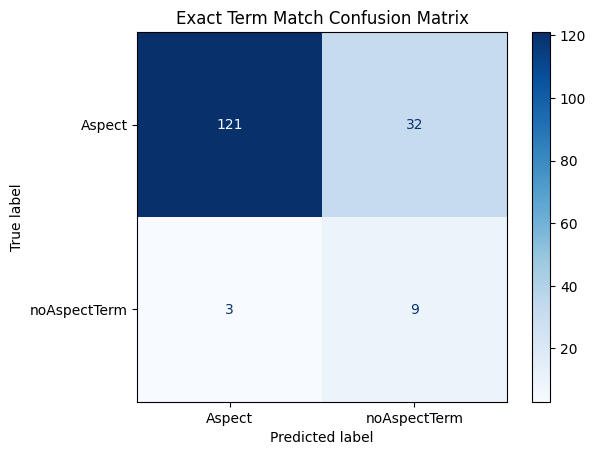


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_combined_exact_match.png


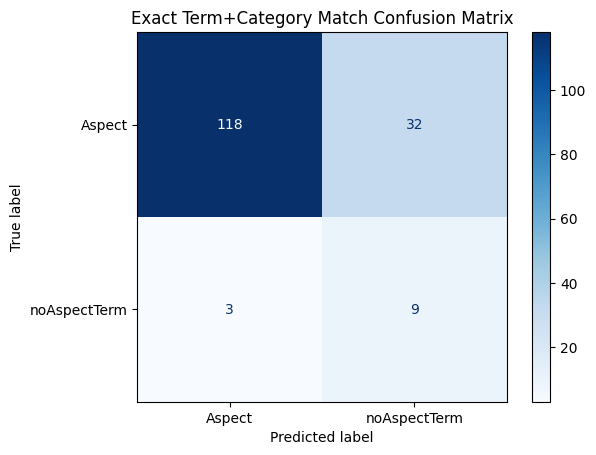


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_term_partial_match.png


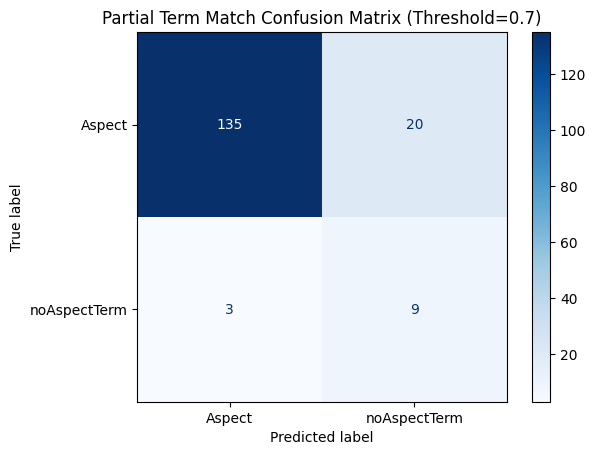


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_combined_partial_match.png


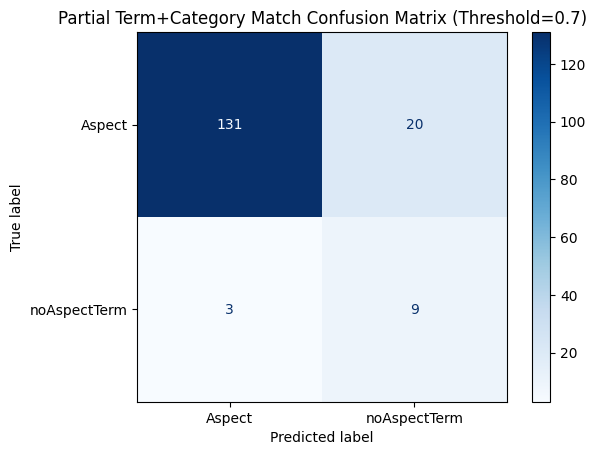

Device set to use cuda:0



Test Results for EXACT and PARTIAL Aspect Terms Match, their Categories for Sentiment Mapping: 


100%|██████████| 102/102 [00:00<00:00, 21551.51it/s]


=== Aspect-Level Sentiment Evaluation ===

Exact Matches:
  Positiv:
    Precision: 0.8841
    Recall:    0.8971
    F1-score:  0.8905
  Negativ:
    Precision: 0.8966
    Recall:    0.8667
    F1-score:  0.8814
  Neutral:
    Precision: 0.7600
    Recall:    0.7600
    F1-score:  0.7600

Partial Matches:
  Positiv:
    Precision: 0.8000
    Recall:    0.8000
    F1-score:  0.8000
  Negativ:
    Precision: 1.0000
    Recall:    1.0000
    F1-score:  1.0000
  Neutral:
    Precision: 0.5000
    Recall:    0.5000
    F1-score:  0.5000

=== Category-Level Sentiment Evaluation ===

Exact Matches:
  Positiv:
    Precision: 0.8806
    Recall:    0.8939
    F1-score:  0.8872
  Negativ:
    Precision: 0.8929
    Recall:    0.8621
    F1-score:  0.8772
  Neutral:
    Precision: 0.7600
    Recall:    0.7600
    F1-score:  0.7600

Partial Matches:
  Positiv:
    Precision: 0.8000
    Recall:    0.8000
    F1-score:  0.8000
  Negativ:
    Precision: 1.0000
    Recall:    1.0000
    F1-score:  1.000

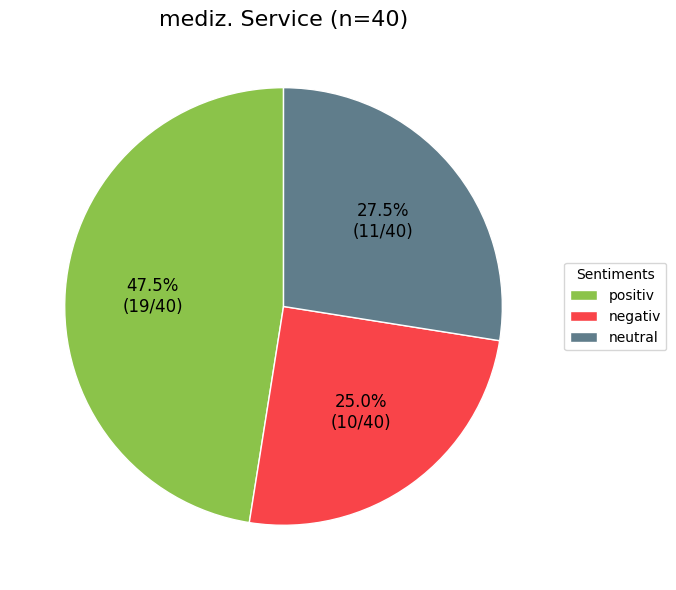

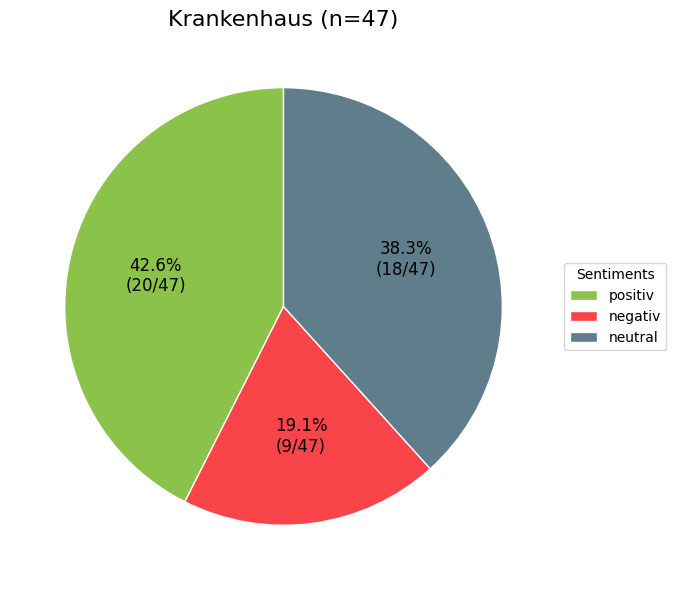

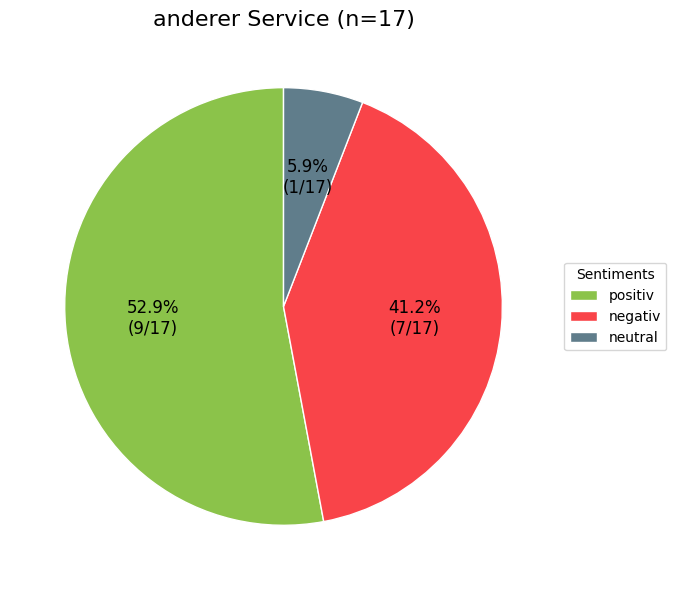

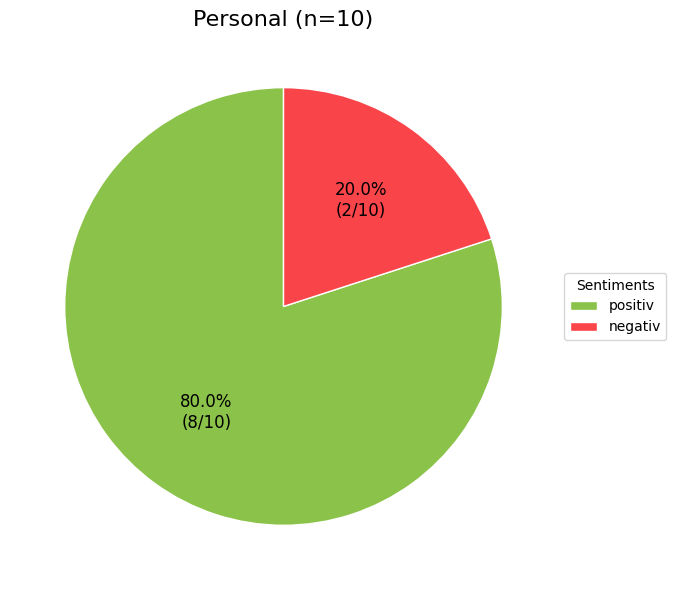

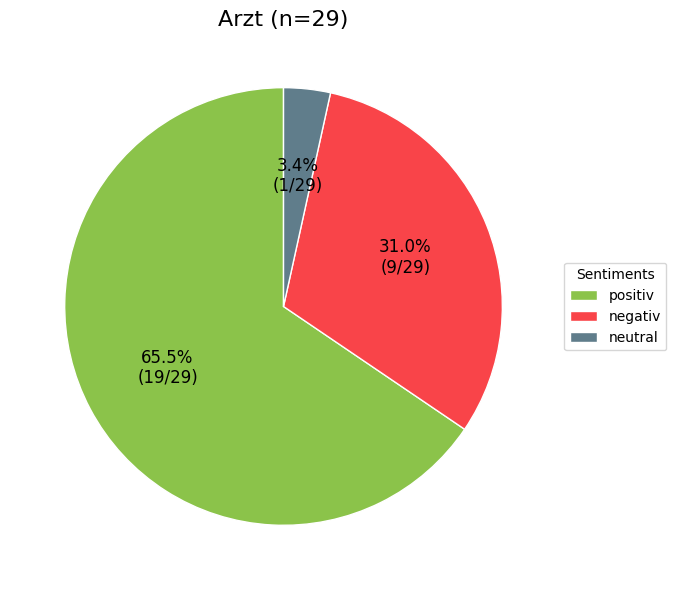

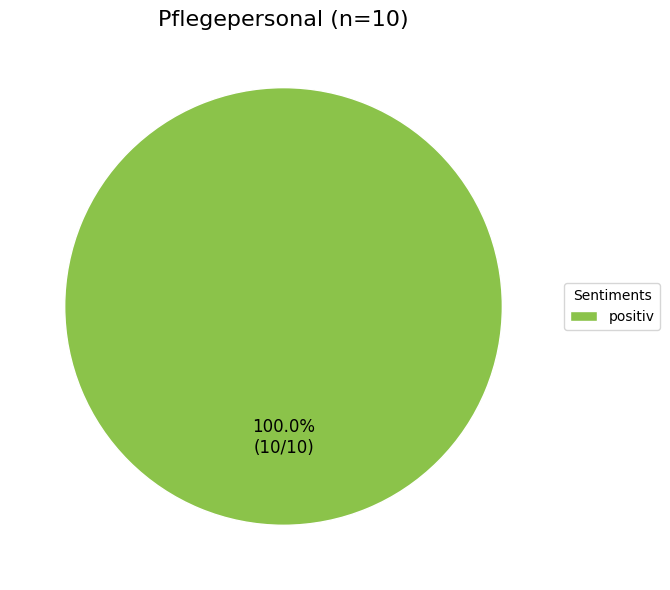

Sentiment distribution pie charts saved successfully to ./pipeline_results/sentiment_by_cat/!

=== Confusion Matrices ===

Aspect Exact:
True \ Predictedposit     negat     neutr     
positiv        61        2         5         
negativ        3         26        1         
neutral        5         1         19        

Aspect Partial:
True \ Predictedposit     negat     neutr     
positiv        4         0         1         
negativ        0         1         0         
neutral        1         0         1         

Category Exact:
True \ Predictedposit     negat     neutr     
positiv        59        2         5         
negativ        3         25        1         
neutral        5         1         19        

Category Partial:
True \ Predictedposit     negat     neutr     
positiv        4         0         1         
negativ        0         1         0         
neutral        1         0         1         

Aspect Combined:
True \ Predictedposit     negat     neutr     
posit

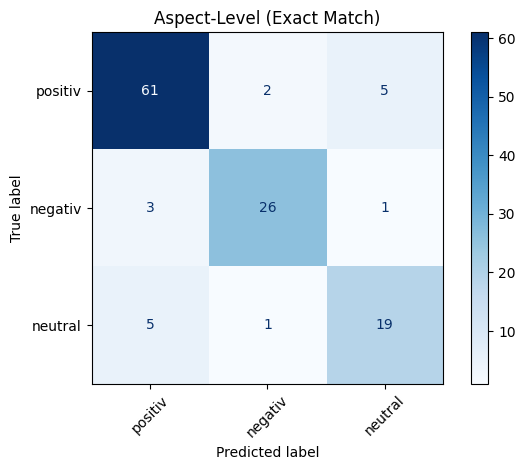


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_aspect-level_partial_match.png


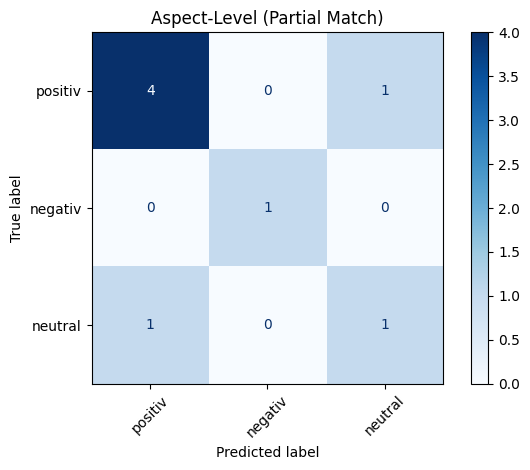


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_exact_match.png


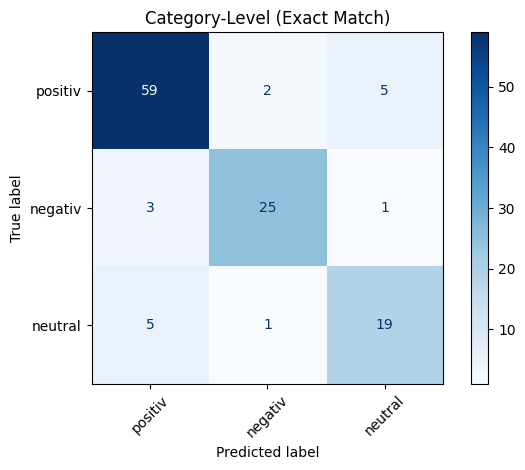


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_partial_match.png


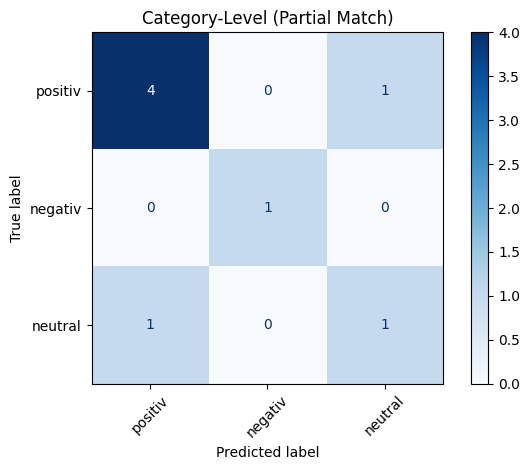


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_aspect-level_exact___partial.png


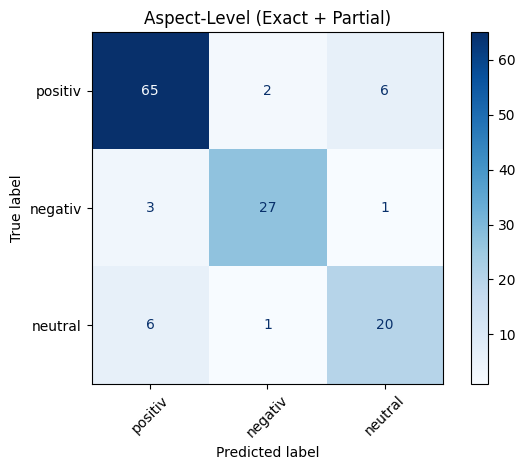


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_exact___partial.png


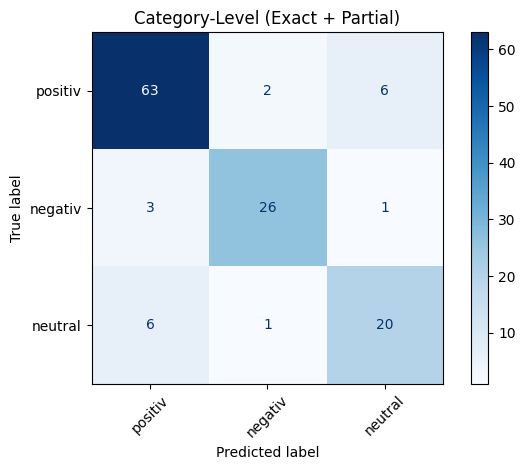


=== PIPELINE OVERALL PERFORMANCE ===

=== EXACT MATCHED TERMS ===

Aspect Term Extraction:
  F1: 0.8736
  Precision: 0.9758
  Recall: 0.7908

Sentiment Analysis (ABSA):
  Macro-F1: 0.8440
  Avg Precision: 0.8469
  Avg Recall: 0.8412

Joint Pipeline Performance:
  Joint F1: 0.8585
  Combined Score: 0.8587

=== EXACT MATCHED TERMS + CATEGORY ===

Aspect Term Extraction:
  F1: 0.8708
  Precision: 0.9752
  Recall: 0.7867

Sentiment Analysis (ABSA):
  Macro-F1: 0.8415
  Avg Precision: 0.8445
  Avg Recall: 0.8387

Joint Pipeline Performance:
  Joint F1: 0.8559
  Combined Score: 0.8561

=== COMBINED (EXACT+PARTIAL) TERMS ===

Aspect Term Extraction:
  F1: 0.9215
  Precision: 0.9783
  Recall: 0.8710

Sentiment Analysis (ABSA):
  Macro-F1: 0.8368
  Avg Precision: 0.8397
  Avg Recall: 0.8340

Joint Pipeline Performance:
  Joint F1: 0.8771
  Combined Score: 0.8785

=== COMBINED (EXACT+PARTIAL) TERMS + CATEGORY ===

Aspect Term Extraction:
  F1: 0.9193
  Precision: 0.9776
  Recall: 0.8675

Sentim

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
Creating heatmaps: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


Predictions saved to ./pipeline_results/test_data_after_pipeline.csv


In [6]:
ate_absa(test_data = test_data, ate_model = ate_cat_model, ate_tokenizer = ate_cat_tokenizer, absa_model = absa_model, absa_tokenizer = absa_tokenizer)

Device set to use cuda:0



Predict Aspect Terms and their Categories: 


100%|██████████| 102/102 [00:01<00:00, 83.13it/s]



Test Results for EXACT and PARTIAL Aspect Terms Match and their Categories: 
=== EXACT MATCHES ===

=== Terms (exact match, term level) ===
Precision: 0.9758 (121/124)
Recall:    0.7908 (121/153)
F1:        0.8736
Accuracy:  0.7879 (130/165)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     121      32
No Aspect           3       9

=== Combined (exact term + category) (exact match, combined level) ===
Precision: 0.9752 (118/121)
Recall:    0.7867 (118/150)
F1:        0.8708
Accuracy:  0.7840 (127/162)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     118      32
No Aspect           3       9

=== PARTIAL MATCHES (including exact) ===

=== Terms (partial match, term level) ===
Precision: 0.9783 (135/138)
Recall:    0.8710 (135/155)
F1:        0.9215
Accuracy:  0.8623 (144/167)

Confusion Matrix:
               Predicted
               Aspect  No Aspect
Actual Aspect     135      20
No Aspect     

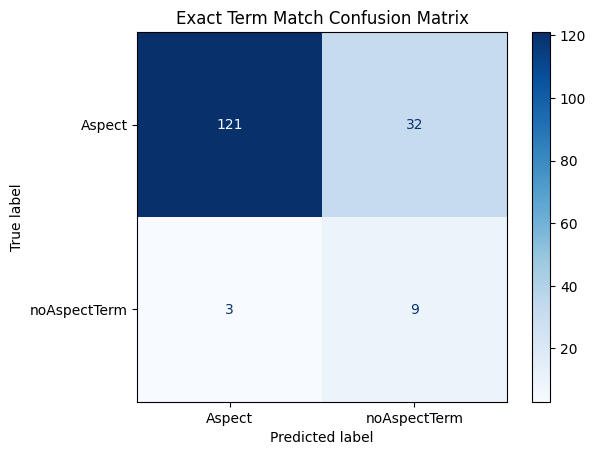


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_combined_exact_match.png


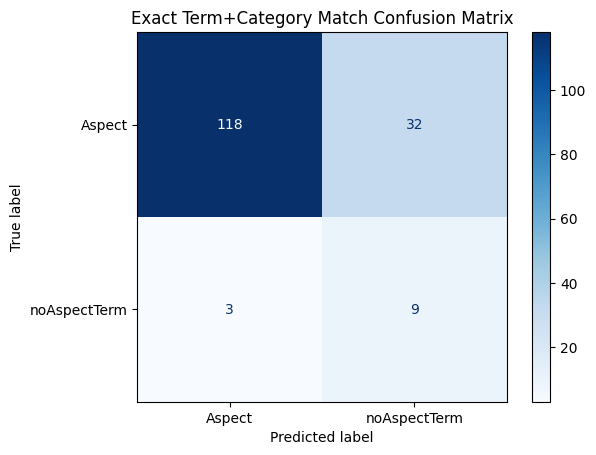


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_term_partial_match.png


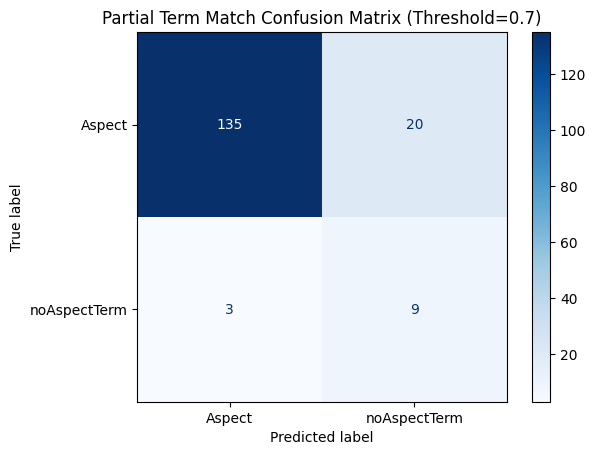


Confusion matrix saved to: ./pipeline_results/conf_matrix/ate/conf_matrix_combined_partial_match.png


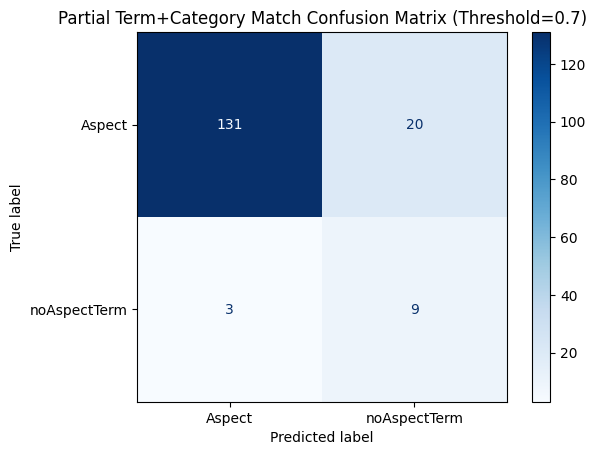

Device set to use cuda:0



Test Results for EXACT and PARTIAL Aspect Terms Match, their Categories for Sentiment Mapping: 


100%|██████████| 102/102 [00:00<00:00, 113299.53it/s]


=== Aspect-Level Sentiment Evaluation ===

Exact Matches:
  Positiv:
    Precision: 0.9254
    Recall:    0.9118
    F1-score:  0.9185
  Negativ:
    Precision: 0.8438
    Recall:    0.9000
    F1-score:  0.8710
  Neutral:
    Precision: 0.8333
    Recall:    0.8000
    F1-score:  0.8163

Partial Matches:
  Positiv:
    Precision: 1.0000
    Recall:    0.6000
    F1-score:  0.7500
  Negativ:
    Precision: 0.5000
    Recall:    1.0000
    F1-score:  0.6667
  Neutral:
    Precision: 0.6667
    Recall:    1.0000
    F1-score:  0.8000

=== Category-Level Sentiment Evaluation ===

Exact Matches:
  Positiv:
    Precision: 0.9231
    Recall:    0.9091
    F1-score:  0.9160
  Negativ:
    Precision: 0.8387
    Recall:    0.8966
    F1-score:  0.8667
  Neutral:
    Precision: 0.8333
    Recall:    0.8000
    F1-score:  0.8163

Partial Matches:
  Positiv:
    Precision: 1.0000
    Recall:    0.6000
    F1-score:  0.7500
  Negativ:
    Precision: 0.5000
    Recall:    1.0000
    F1-score:  0.666

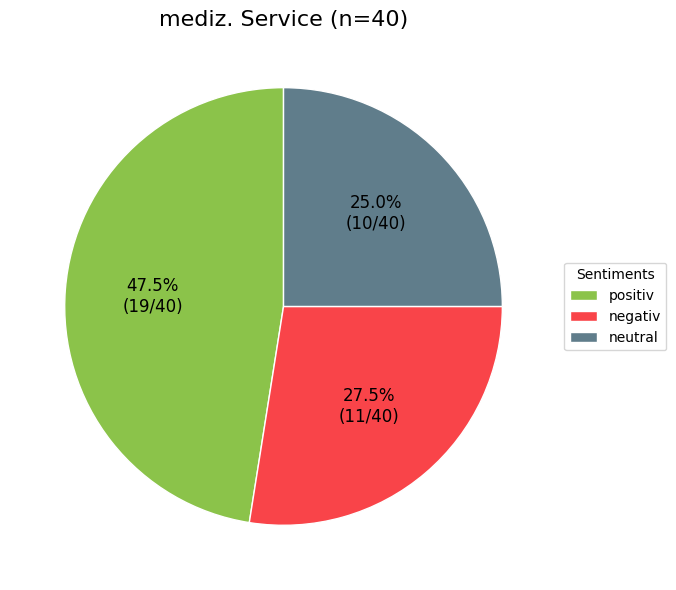

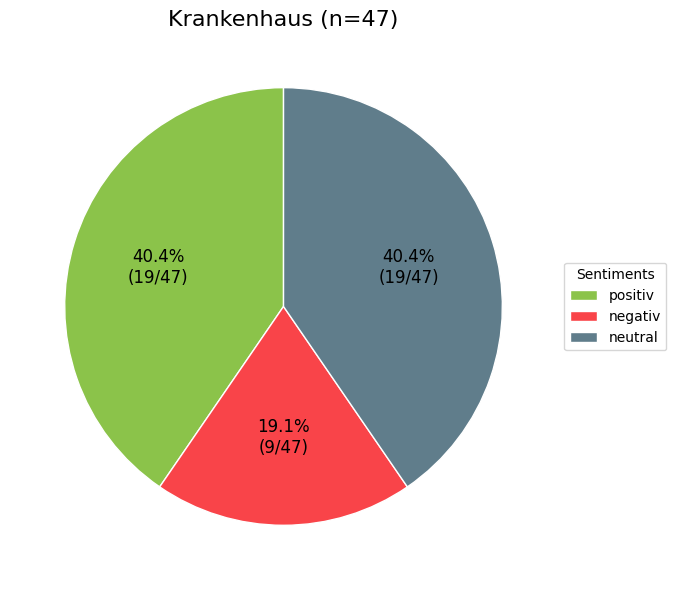

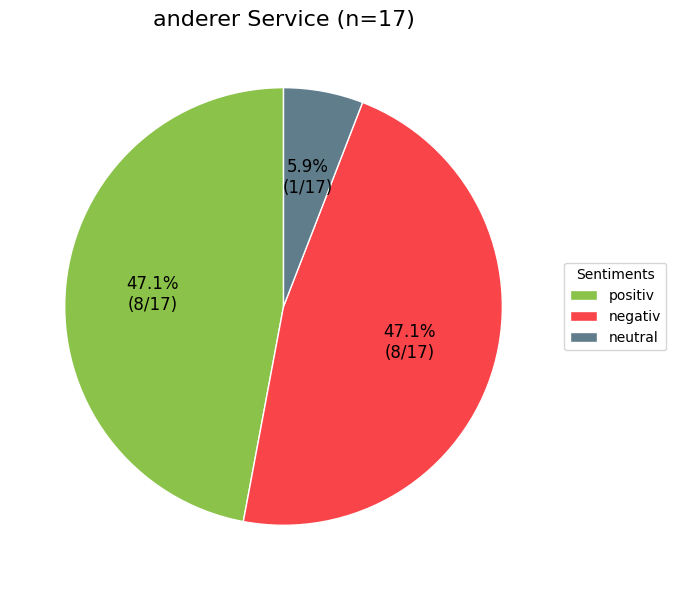

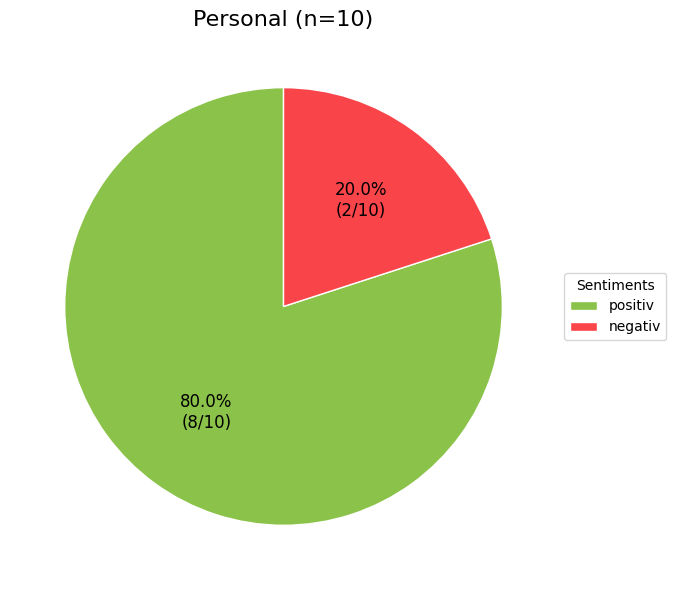

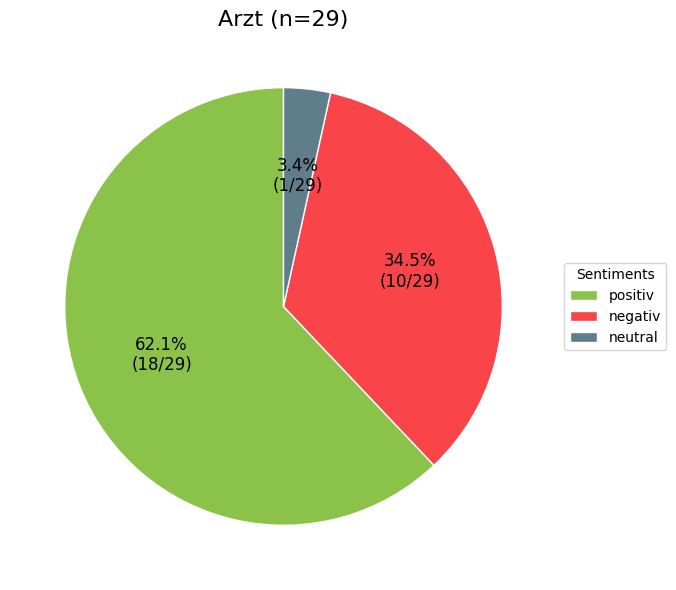

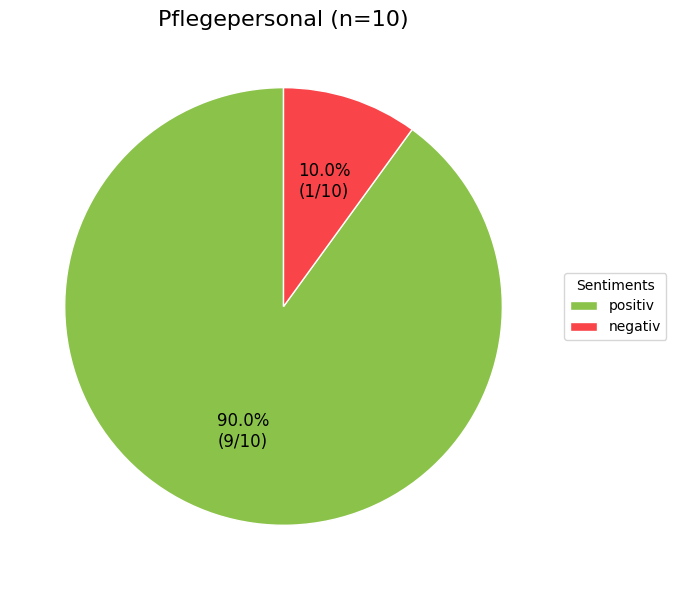

Sentiment distribution pie charts saved successfully to ./pipeline_results/sentiment_by_cat/!

=== Confusion Matrices ===

Aspect Exact:
True \ Predictedposit     negat     neutr     
positiv        62        3         3         
negativ        2         27        1         
neutral        3         2         20        

Aspect Partial:
True \ Predictedposit     negat     neutr     
positiv        3         1         1         
negativ        0         1         0         
neutral        0         0         2         

Category Exact:
True \ Predictedposit     negat     neutr     
positiv        60        3         3         
negativ        2         26        1         
neutral        3         2         20        

Category Partial:
True \ Predictedposit     negat     neutr     
positiv        3         1         1         
negativ        0         1         0         
neutral        0         0         2         

Aspect Combined:
True \ Predictedposit     negat     neutr     
posit

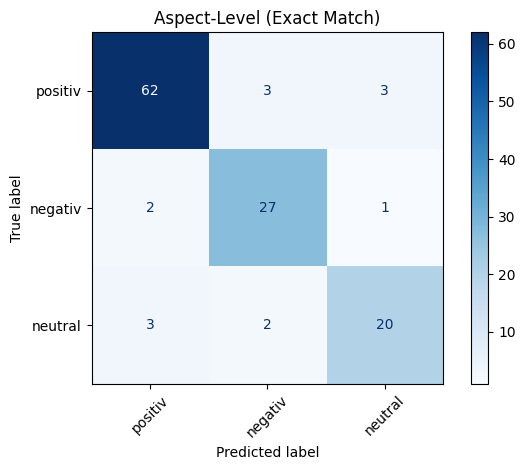


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_aspect-level_partial_match.png


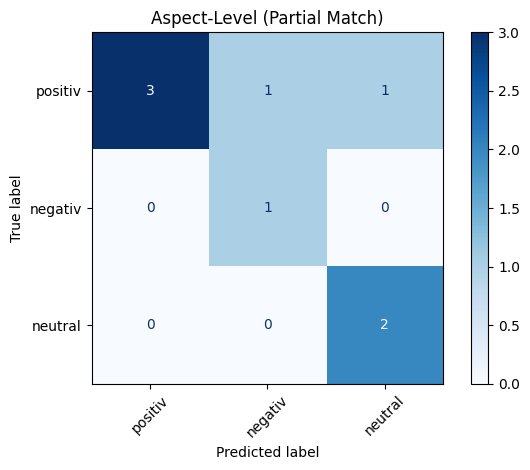


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_exact_match.png


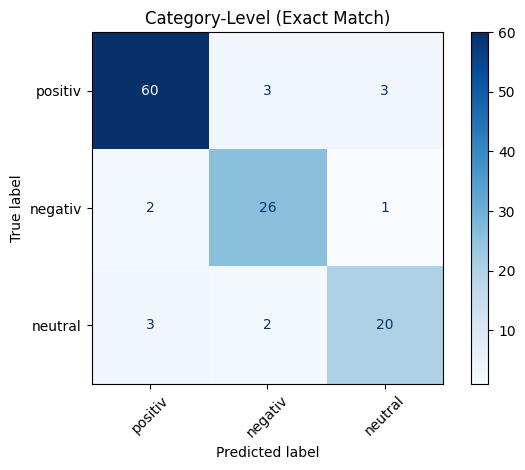


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_partial_match.png


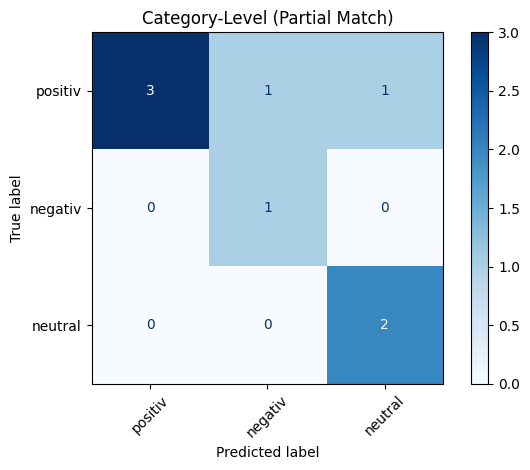


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_aspect-level_exact___partial.png


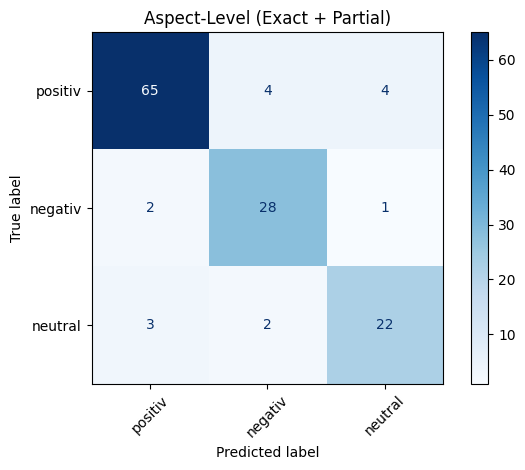


Confusion matrix saved to: ./pipeline_results/conf_matrix/absa/conf_matrix_category-level_exact___partial.png


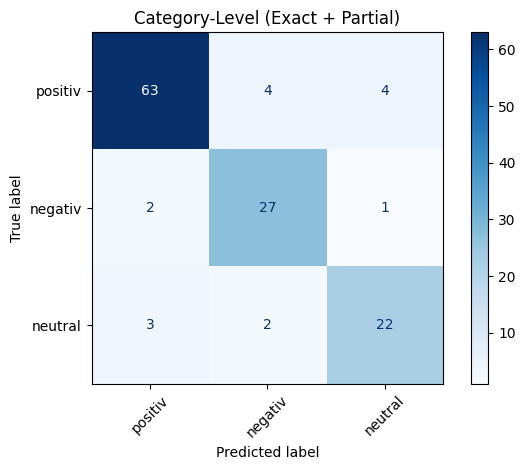


=== PIPELINE OVERALL PERFORMANCE ===

=== EXACT MATCHED TERMS ===

Aspect Term Extraction:
  F1: 0.8736
  Precision: 0.9758
  Recall: 0.7908

Sentiment Analysis (ABSA):
  Macro-F1: 0.8686
  Avg Precision: 0.8675
  Avg Recall: 0.8706

Joint Pipeline Performance:
  Joint F1: 0.8711
  Combined Score: 0.8711

=== EXACT MATCHED TERMS + CATEGORY ===

Aspect Term Extraction:
  F1: 0.8708
  Precision: 0.9752
  Recall: 0.7867

Sentiment Analysis (ABSA):
  Macro-F1: 0.8686
  Avg Precision: 0.8675
  Avg Recall: 0.8706

Joint Pipeline Performance:
  Joint F1: 0.8697
  Combined Score: 0.8697

=== COMBINED (EXACT+PARTIAL) TERMS ===

Aspect Term Extraction:
  F1: 0.9215
  Precision: 0.9783
  Recall: 0.8710

Sentiment Analysis (ABSA):
  Macro-F1: 0.8618
  Avg Precision: 0.8556
  Avg Recall: 0.8695

Joint Pipeline Performance:
  Joint F1: 0.8907
  Combined Score: 0.8913

=== COMBINED (EXACT+PARTIAL) TERMS + CATEGORY ===

Aspect Term Extraction:
  F1: 0.9193
  Precision: 0.9776
  Recall: 0.8675

Sentim

Creating heatmaps: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]


Predictions saved to ./pipeline_results/test_data_after_pipeline.csv


In [6]:
ate_absa(test_data = test_data, ate_model = ate_cat_model, ate_tokenizer = ate_cat_tokenizer, absa_model = absa_model2, absa_tokenizer = absa_tokenizer2)

## 4. Run Pipeline for unlabeled dataset

Device set to use cuda:0



Predicting Aspect Terms and their Categories


100%|██████████| 3668/3668 [00:44<00:00, 81.92it/s]
Device set to use cuda:0



Predicting Sentiment for Extracted Aspects


100%|██████████| 3668/3668 [00:00<00:00, 125625.34it/s]
Device set to use cuda:0



Analyzing general sentiment for sentences with no detected aspects


General sentiment analysis for 'Allgemein': 100%|██████████| 3668/3668 [00:09<00:00, 392.35it/s]



Analyzing Sentiment Distribution by Category


Processing sentiment distribution: 100%|██████████| 3668/3668 [00:00<00:00, 17828.00it/s]



=== Sentiment Distribution by Category ===

Allgemein (n=927):
  Positiv: 189 (20.4%)
  Negativ: 311 (33.5%)
  Neutral: 427 (46.1%)

Arzt (n=668):
  Positiv: 293 (43.9%)
  Negativ: 240 (35.9%)
  Neutral: 135 (20.2%)

Krankenhaus (n=1188):
  Positiv: 340 (28.6%)
  Negativ: 406 (34.2%)
  Neutral: 442 (37.2%)

Personal (n=263):
  Positiv: 139 (52.9%)
  Negativ: 101 (38.4%)
  Neutral: 23 (8.7%)

Pflegepersonal (n=433):
  Positiv: 250 (57.7%)
  Negativ: 143 (33.0%)
  Neutral: 40 (9.2%)

anderer Service (n=846):
  Positiv: 238 (28.1%)
  Negativ: 406 (48.0%)
  Neutral: 202 (23.9%)

mediz. Service (n=1462):
  Positiv: 445 (30.4%)
  Negativ: 490 (33.5%)
  Neutral: 527 (36.0%)

Generating sentiment distribution plots


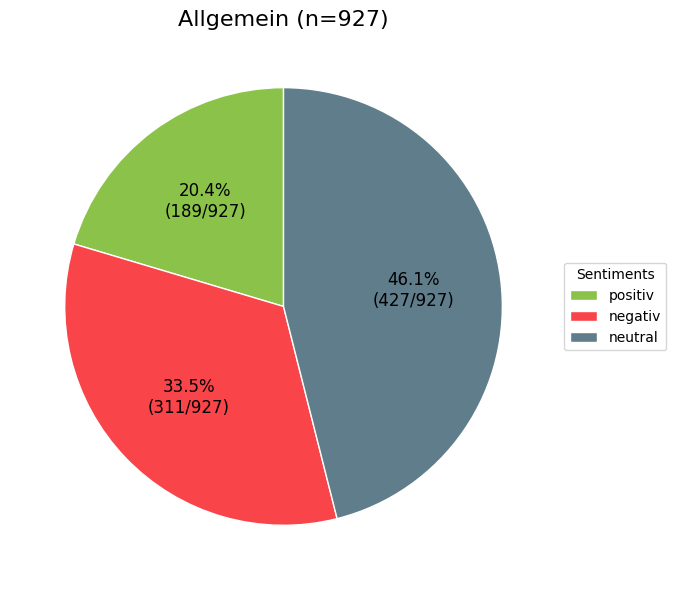

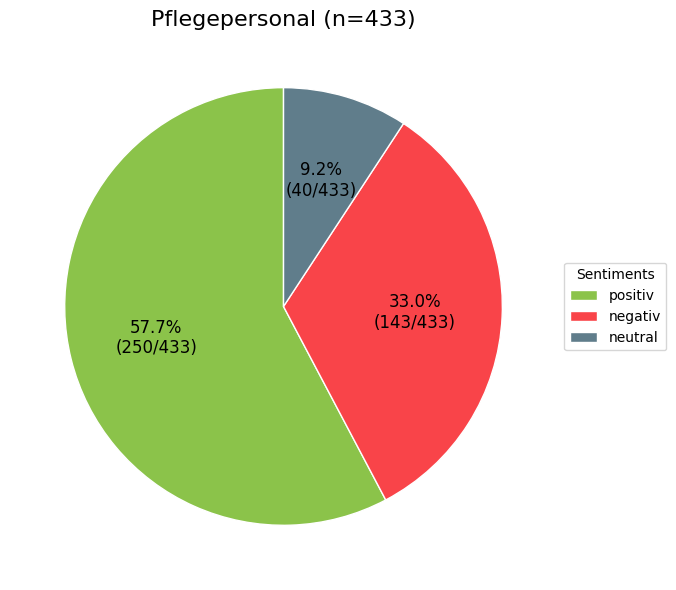

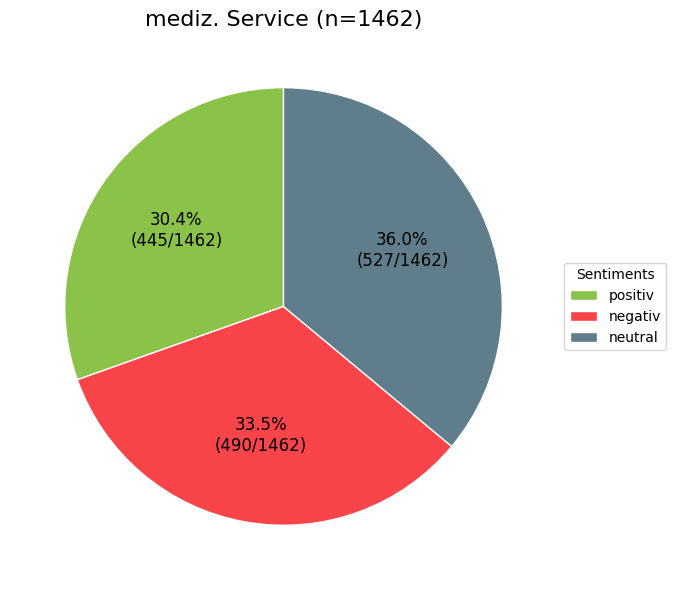

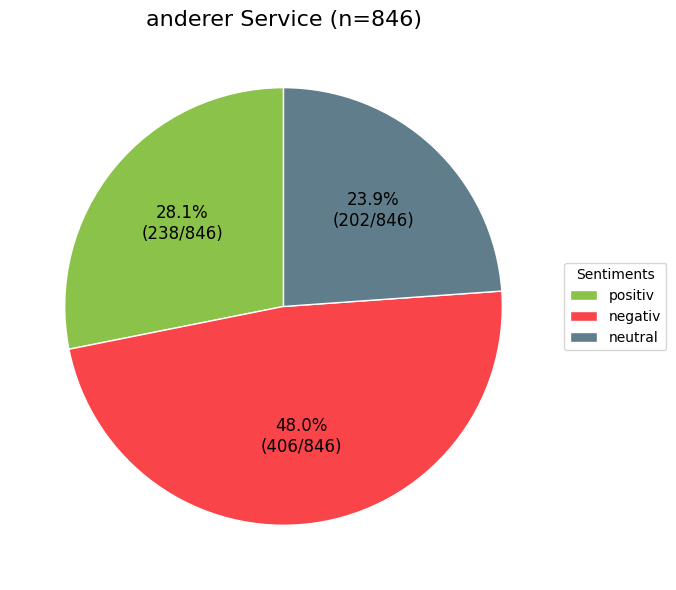

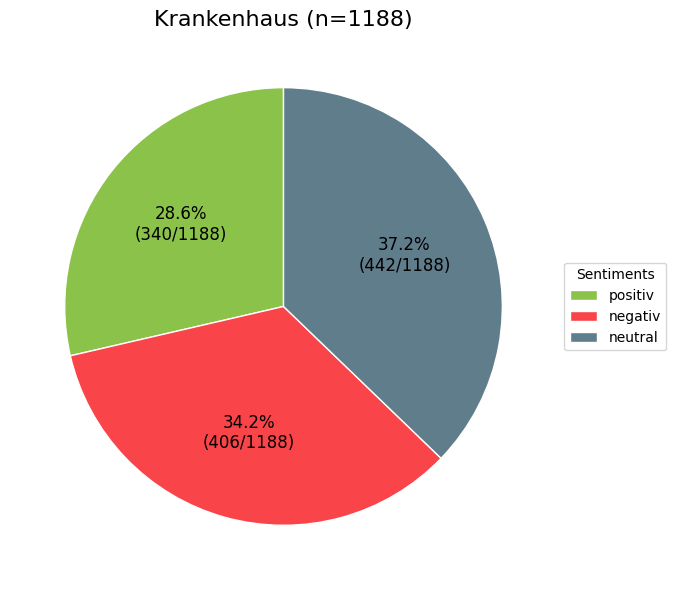

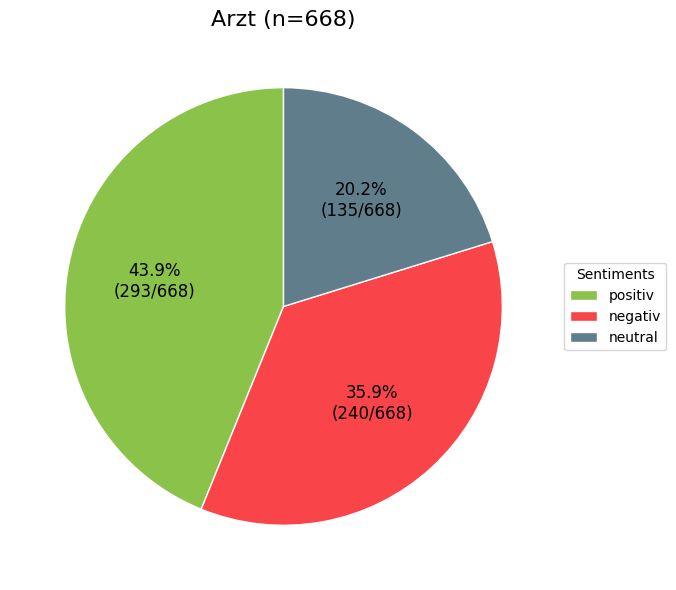

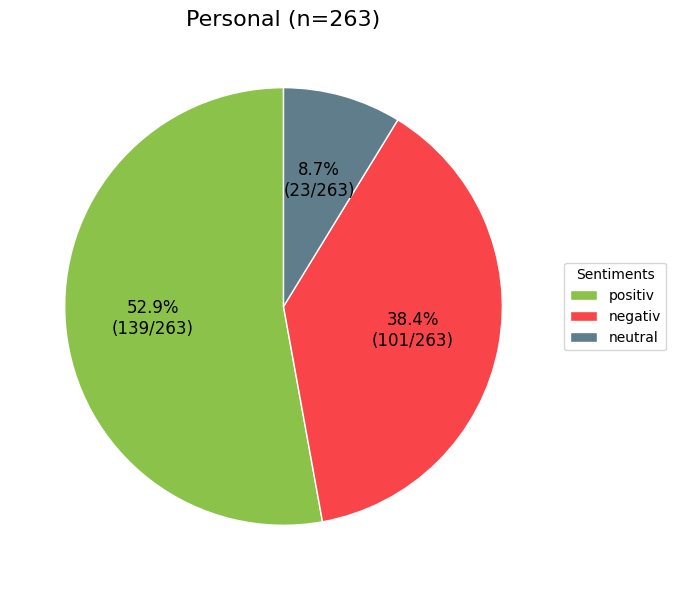

Sentiment distribution pie charts saved successfully to ./pipeline_results/unlabeled_sentiment_by_cat/!

Generating heatmaps for 5 examples...


Creating heatmaps: 100%|██████████| 5/5 [00:26<00:00,  5.22s/it]



Predictions saved to ./pipeline_results/unlabeled_data_with_predictions.csv
Detailed text results saved to ./pipeline_results/detailed_pipeline_results.txt


In [7]:
# Run pipeline
results_df = ate_absa_unlabeled(unlabeled_data=data_unlabeled, ate_model=ate_cat_model, ate_tokenizer=ate_cat_tokenizer, absa_model=absa_model, absa_tokenizer=absa_tokenizer)

In [8]:
results_df

,review_id,sentence_id,raw_text,predicted_aspects_with_cat,aspects_with_sentiment
0,2.0,4691,"Viele Monate später bin ich immer noch dabei, ...","[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
1,2.0,4692,Frauen haben etwas Besseres verdient.,"[{'term': 'Frauen', 'category': 'Pflegepersona...","[{'term': 'Frauen', 'category': 'Pflegepersona..."
2,4.0,4699,Werden jetzt an die Öffentlichkeit gehen.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3,9.0,4724,Ich hatte.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
4,9.0,4726,Ich kann mir erlauben das zu sagen.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
...,...,...,...,...,...
3663,485.0,9330,Ich brachte im Dezember 2002 meinen Sohn zur W...,"[{'term': 'Welt', 'category': 'mediz. Service'}]","[{'term': 'Welt', 'category': 'mediz. Service'..."
3664,485.0,9331,Also ich fühlte mich hier sehr gut aufgehoben.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3665,485.0,9332,Mit freundlich Grüssen!,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3666,486.0,9339,Ohne Komplikationen verlief die Op und die Nac...,"[{'term': 'Op', 'category': 'mediz. Service'},...","[{'term': 'Op', 'category': 'mediz. Service', ..."


Device set to use cuda:0



Predicting Aspect Terms and their Categories


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
100%|██████████| 3668/3668 [00:58<00:00, 62.96it/s]
Device set to use cuda:0



Predicting Sentiment for Extracted Aspects


100%|██████████| 3668/3668 [00:00<00:00, 153997.99it/s]
Device set to use cuda:0



Analyzing general sentiment for sentences with no detected aspects


General sentiment analysis for 'Allgemein': 100%|██████████| 3668/3668 [00:23<00:00, 158.60it/s]



Analyzing Sentiment Distribution by Category


Processing sentiment distribution: 100%|██████████| 3668/3668 [00:00<00:00, 12959.73it/s]



=== Sentiment Distribution by Category ===

Allgemein (n=927):
  Positiv: 147 (15.9%)
  Negativ: 548 (59.1%)
  Neutral: 232 (25.0%)

Arzt (n=668):
  Positiv: 272 (40.7%)
  Negativ: 275 (41.2%)
  Neutral: 121 (18.1%)

Krankenhaus (n=1188):
  Positiv: 336 (28.3%)
  Negativ: 472 (39.7%)
  Neutral: 380 (32.0%)

Personal (n=263):
  Positiv: 130 (49.4%)
  Negativ: 115 (43.7%)
  Neutral: 18 (6.8%)

Pflegepersonal (n=433):
  Positiv: 234 (54.0%)
  Negativ: 162 (37.4%)
  Neutral: 37 (8.5%)

anderer Service (n=846):
  Positiv: 233 (27.5%)
  Negativ: 444 (52.5%)
  Neutral: 169 (20.0%)

mediz. Service (n=1462):
  Positiv: 452 (30.9%)
  Negativ: 540 (36.9%)
  Neutral: 470 (32.1%)

Generating sentiment distribution plots


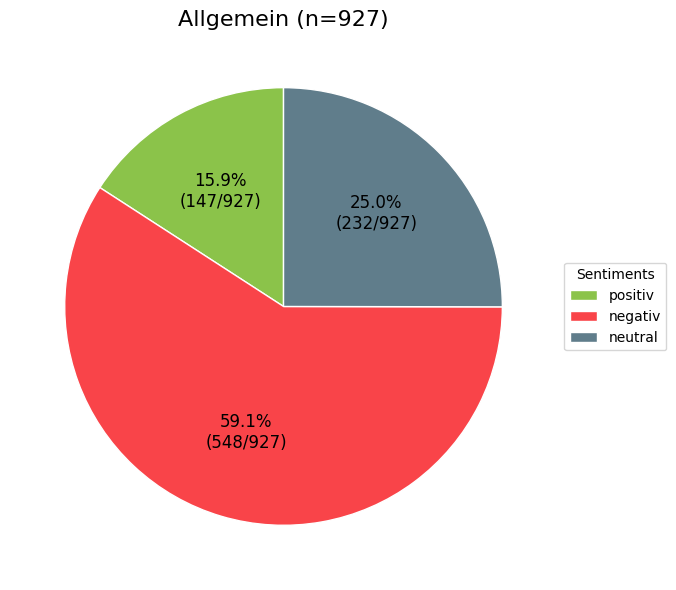

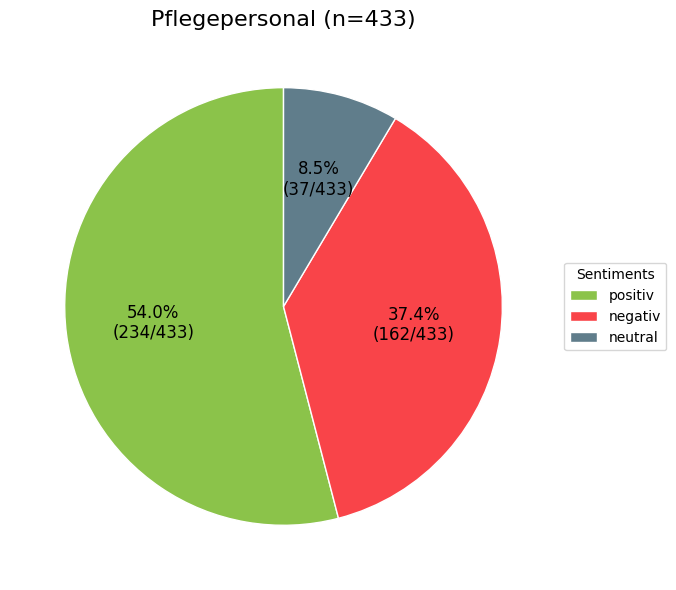

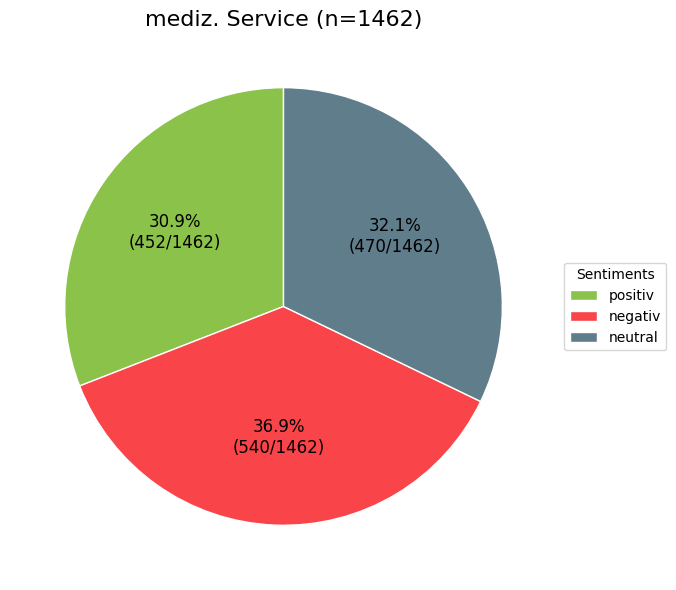

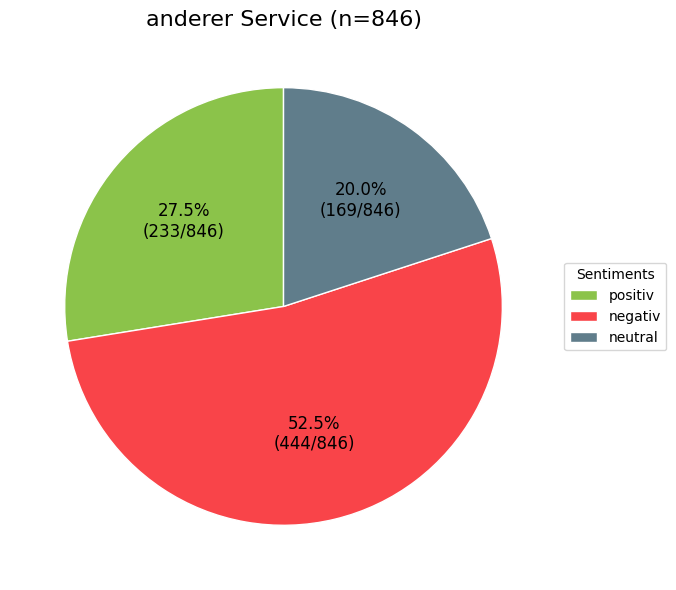

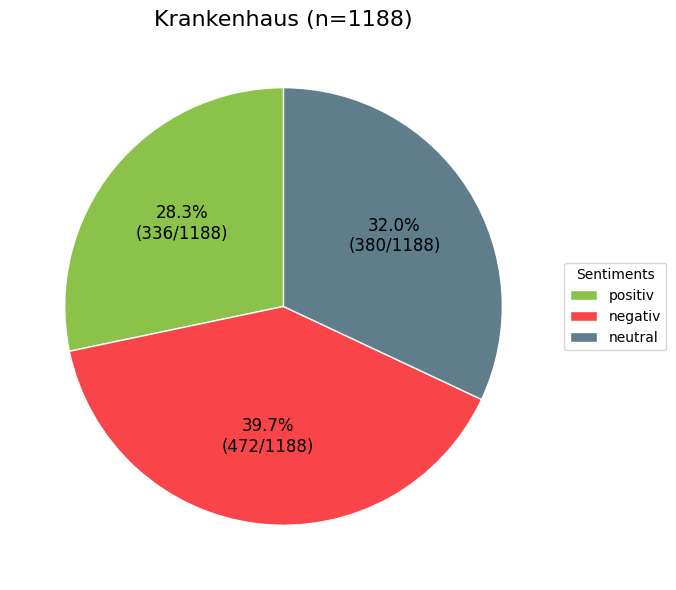

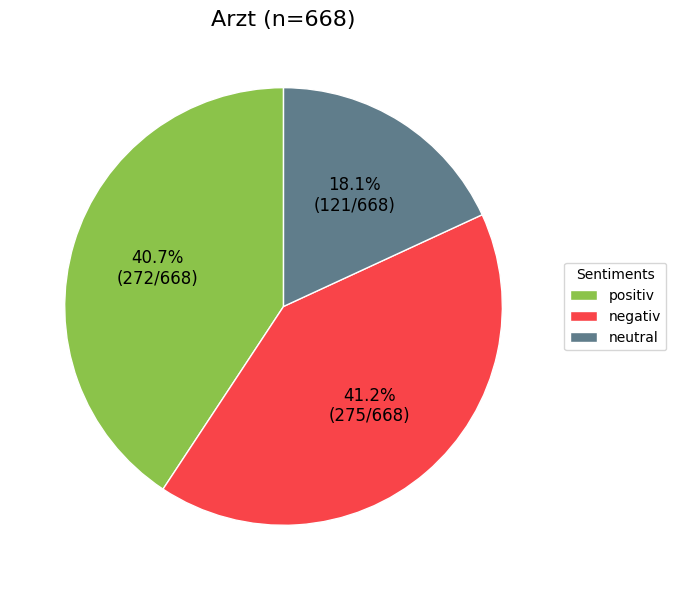

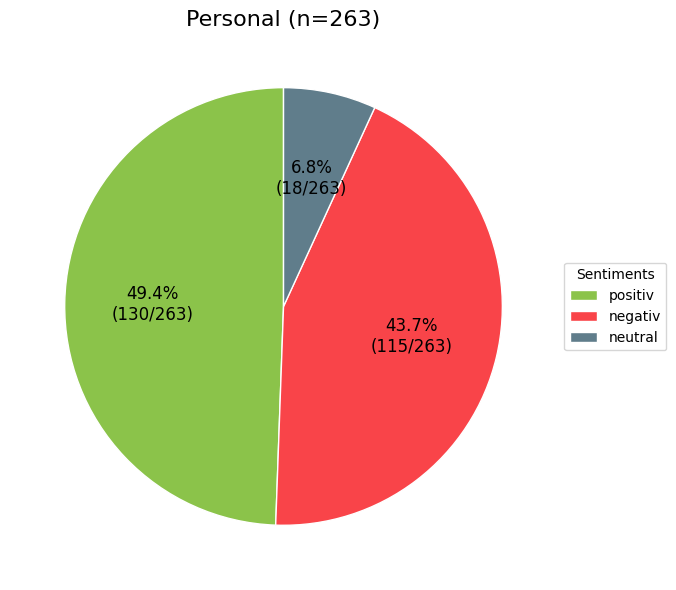

Sentiment distribution pie charts saved successfully to ./pipeline_results/unlabeled_sentiment_by_cat/!

Generating heatmaps for 5 examples...


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.
Creating heatmaps: 100%|██████████| 5/5 [00:30<00:00,  6.05s/it]



Predictions saved to ./pipeline_results/unlabeled_data_with_predictions.csv
Detailed text results saved to ./pipeline_results/detailed_pipeline_results.txt


In [5]:
# Run pipeline
results_df = ate_absa_unlabeled(unlabeled_data=data_unlabeled, ate_model=ate_cat_model, ate_tokenizer=ate_cat_tokenizer, absa_model=absa_model2, absa_tokenizer=absa_tokenizer2)

In [6]:
results_df

,review_id,sentence_id,raw_text,predicted_aspects_with_cat,aspects_with_sentiment
0,2.0,4691,"Viele Monate später bin ich immer noch dabei, ...","[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
1,2.0,4692,Frauen haben etwas Besseres verdient.,"[{'term': 'Frauen', 'category': 'Pflegepersona...","[{'term': 'Frauen', 'category': 'Pflegepersona..."
2,4.0,4699,Werden jetzt an die Öffentlichkeit gehen.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3,9.0,4724,Ich hatte.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
4,9.0,4726,Ich kann mir erlauben das zu sagen.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
...,...,...,...,...,...
3663,485.0,9330,Ich brachte im Dezember 2002 meinen Sohn zur W...,"[{'term': 'Welt', 'category': 'mediz. Service'}]","[{'term': 'Welt', 'category': 'mediz. Service'..."
3664,485.0,9331,Also ich fühlte mich hier sehr gut aufgehoben.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3665,485.0,9332,Mit freundlich Grüssen!,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3666,486.0,9339,Ohne Komplikationen verlief die Op und die Nac...,"[{'term': 'Op', 'category': 'mediz. Service'},...","[{'term': 'Op', 'category': 'mediz. Service', ..."


In [14]:
# extract top 20 aspect terms
try:
    aspects_list = results_df['predicted_aspects_with_cat'].explode().tolist()
except:
    aspects_list = results_df['predicted_aspects_with_cat'].apply(ast.literal_eval).explode().tolist()

# Extract (term, category) pairs, skipping 'noAspectTerm'
term_category_pairs = [
    (item['term'], item['category']) 
    for item in aspects_list 
    #if item['term'] != 'noAspectTerm'
]

# Count frequencies
term_category_counts = Counter(term_category_pairs)

# Get top 20 most common (term, category) pairs
top_20_term_category = term_category_counts.most_common(20)

# Convert to a DataFrame for better readability
top_20_df = pd.DataFrame(
    top_20_term_category, 
    columns=['(Term, Category)', 'Count']
)
print(top_20_df)

                (Term, Category)  Count
0      (noAspectTerm, Allgemein)    927
1          (Klinik, Krankenhaus)    124
2                  (Ärzte, Arzt)    119
3   (Schwestern, Pflegepersonal)    112
4           (OP, mediz. Service)    107
5                   (Arzt, Arzt)     98
6       (Uniklinik, Krankenhaus)     82
7           (Personal, Personal)     65
8         (Station, Krankenhaus)     51
9    (Schwester, Pflegepersonal)     50
10     (Termin, anderer Service)     48
11  (Behandlung, mediz. Service)     46
12         (Zimmer, Krankenhaus)     40
13      (Essen, anderer Service)     38
14   (Betreuung, mediz. Service)     37
15    (Notaufnahme, Krankenhaus)     37
16    (Krankenhaus, Krankenhaus)     35
17    (operiert, mediz. Service)     34
18            (Uni, Krankenhaus)     32
19                (Ärztin, Arzt)     32


In [7]:
# Sample 10% of the data (366 sentences for 3668 total)
sampled_data = results_df.sample(frac=0.1, random_state=42)  # random_state ensures reproducibility
sampled_data

,review_id,sentence_id,raw_text,predicted_aspects_with_cat,aspects_with_sentiment
179,70.0,5300,Das beste ist man hat seine Schmerzmedikamente...,"[{'term': 'Schmerzmedikamente', 'category': 'm...","[{'term': 'Schmerzmedikamente', 'category': 'm..."
2679,372.0,8242,Alles in allem: Kann defintiv nicht weiterempf...,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
3133,422.0,8720,So haben sich weitere Termine nach uns um mind...,"[{'term': 'Termine', 'category': 'anderer Serv...","[{'term': 'Termine', 'category': 'anderer Serv..."
1061,202.0,6412,(Der Arzt riet vorsorglich von einer solchen T...,"[{'term': 'Arzt', 'category': 'Arzt'}, {'term'...","[{'term': 'Arzt', 'category': 'Arzt', 'sentime..."
1091,206.0,6441,"Ich komme wie geplant zum Termin, angemeldet u...","[{'term': 'Termin', 'category': 'anderer Servi...","[{'term': 'Termin', 'category': 'anderer Servi..."
...,...,...,...,...,...
1042,200.0,6393,Wobei auch wir Patienten etwas dafür tun müsse...,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
80,54.0,5164,"Manch eine:r ist nur froh, wenn es vorbei ist.","[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
387,115.0,5619,Nicht zu empfehlen.,"[{'term': 'noAspectTerm', 'category': 'Allgeme...","[{'term': 'noAspectTerm', 'category': 'Allgeme..."
295,102.0,5510,Meine persönlichen Erfahrungen mit dem UKL sin...,"[{'term': 'UKL', 'category': 'Krankenhaus'}, {...","[{'term': 'UKL', 'category': 'Krankenhaus', 's..."


In [13]:
# extract top 20 aspect terms
try:
    aspects_list = sampled_data['predicted_aspects_with_cat'].explode().tolist()
except:
    aspects_list = sampled_data['predicted_aspects_with_cat'].apply(ast.literal_eval).explode().tolist()

# Extract (term, category) pairs, skipping 'noAspectTerm'
term_category_pairs = [
    (item['term'], item['category']) 
    for item in aspects_list 
    #if item['term'] != 'noAspectTerm'
]

# Count frequencies
term_category_counts = Counter(term_category_pairs)

# Get top 20 most common (term, category) pairs
top_20_term_category = term_category_counts.most_common(20)

# Convert to a DataFrame for better readability
top_20_df = pd.DataFrame(
    top_20_term_category, 
    columns=['(Term, Category)', 'Count']
)
print(top_20_df)

                (Term, Category)  Count
0      (noAspectTerm, Allgemein)     86
1                  (Ärzte, Arzt)     15
2           (OP, mediz. Service)     13
3   (Schwestern, Pflegepersonal)     12
4                   (Arzt, Arzt)      8
5       (Geburt, mediz. Service)      8
6          (Klinik, Krankenhaus)      8
7   (Behandlung, mediz. Service)      7
8       (Essen, anderer Service)      6
9         (Station, Krankenhaus)      6
10      (Uniklinik, Krankenhaus)      5
11          (Personal, Personal)      5
12   (Schwester, Pflegepersonal)      5
13    (Diagnose, mediz. Service)      4
14  (Wartezeit, anderer Service)      4
15   (behandelt, mediz. Service)      4
16       (Klinikum, Krankenhaus)      4
17    (Notaufnahme, Krankenhaus)      4
18     (Hebamme, Pflegepersonal)      4
19   (Schmerzen, mediz. Service)      4


In [14]:
# Select key columns to save
output_columns = ['review_id','sentence_id', 'raw_text', 'aspects_with_sentiment']

sampled_data[output_columns].to_csv(
    "./pipeline_results/manual_evaluation_sample.csv", 
    index=False, 
    encoding='utf-8-sig'  # For proper German character handling
)

In [18]:
sampled_data = pd.read_csv("./pipeline_results/manual_evaluation_sample.csv")

In [26]:
term_count = 0
for cell in sampled_data['aspects_with_sentiment']:
    try:
        data = cell
        if isinstance(data, list):
            term_count += len(data)
        elif isinstance(data, dict):
            term_count += 1
    except:
        continue

if term_count == 0: # if data is loaded again
    for cell in sampled_data['aspects_with_sentiment']:
        try:
            data = ast.literal_eval(cell)
            if isinstance(data, list):
                term_count += len(data)
            elif isinstance(data, dict):
                term_count += 1
        except:
            continue

print(f"Total terms: {term_count}")

Total terms: 575


In [30]:
no_aspect_count = 0

for cell in sampled_data['aspects_with_sentiment']:
    try:
        data = cell
        if isinstance(data, list):
            for item in data:
                if isinstance(item, dict) and item.get('term') == 'noAspectTerm':
                    no_aspect_count += 1
                    break  # Count once per row even if multiple entries
        elif isinstance(data, dict) and data.get('term') == 'noAspectTerm':
            no_aspect_count += 1
    except:
        continue

if no_aspect_count == 0: # if data is loaded again
    for cell in sampled_data['aspects_with_sentiment']:
        data = ast.literal_eval(cell)
        if isinstance(data, list):
            for item in data:
                if isinstance(item, dict) and item.get('term') == 'noAspectTerm':
                    no_aspect_count += 1
                    break  # Count once per row even if multiple entries
        elif isinstance(data, dict) and data.get('term') == 'noAspectTerm':
            no_aspect_count += 1

print(f"Rows containing noAspectTerm: {no_aspect_count}")

Rows containing noAspectTerm: 86
